In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [7]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import LabelEncoder and StandardScaler
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';') # TODO: Load CSV with correct separator

    # Create a copy for processing to avoid changing the original 'df'
    df_processed = df.copy()

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df_processed.columns:
            # Apply LabelEncoder
            df_processed[col] = le.fit_transform(df_processed[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']

    # TODO: Select features
    # Select the specified features from the processed dataframe
    X = df_processed[features]

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) # TODO: Apply StandardScaler

    # Return the scaled data and the *original* dataframe
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


Generating Feature Correlation Matrix...


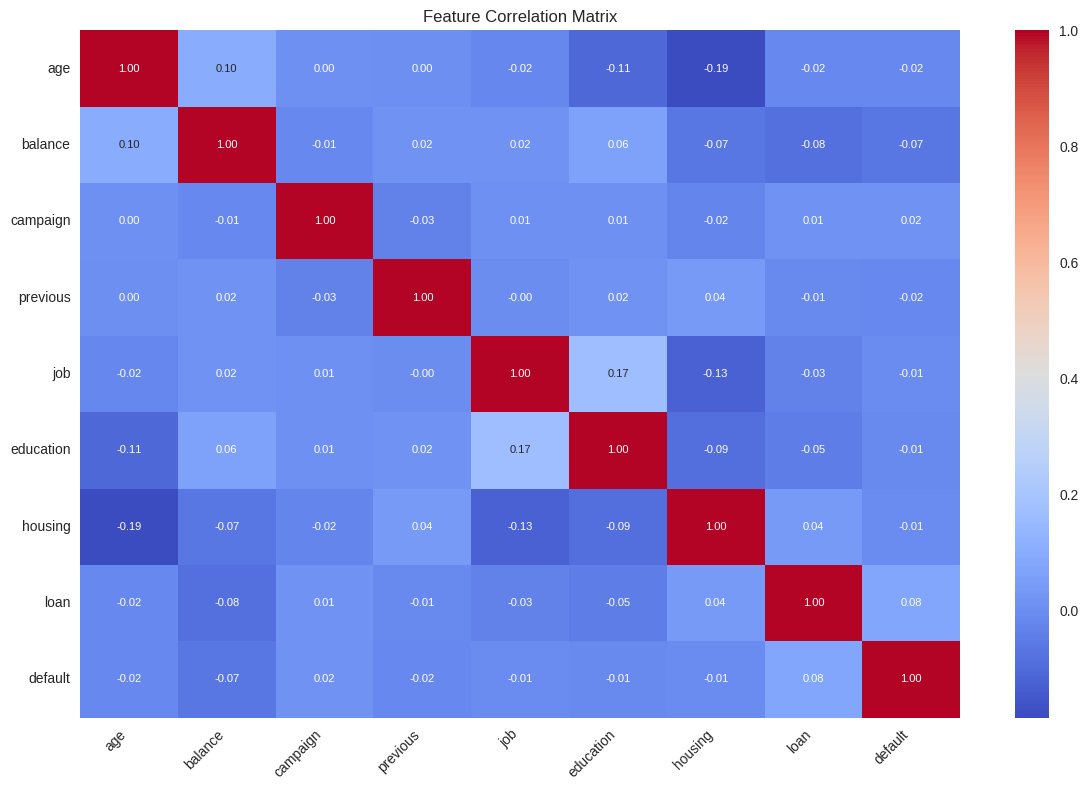

Correlation matrix plot saved as 'correlation_matrix.png'.


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
try:
    df = pd.read_csv('bank-full.csv', sep=';')
except FileNotFoundError:
    print("Error: bank-full.csv not found. Make sure it's in the same directory.")
    # Stop execution if file isn't found
    raise

# Create a copy to process
df_processed = df.copy()

# --- 2. Process Data (Label Encoding) ---
# List of columns to turn from text to numbers
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome', 'y']

le = LabelEncoder()
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = le.fit_transform(df_processed[col])

# --- 3. Select Features for Correlation ---
# These are the 9 features used for clustering in the lab
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
            'housing', 'loan', 'default']
processed_features_df = df_processed[features]

# --- 4. Generate and Plot Correlation Matrix ---
print("Generating Feature Correlation Matrix...")
plt.figure(figsize=(12, 8))

# Calculate the correlation
corr = processed_features_df.corr()

# Plot the heatmap
sns.heatmap(corr,
            annot=True,       # Show the correlation numbers
            fmt='.2f',        # Format numbers to 2 decimal places
            cmap='coolwarm',  # Use a blue-to-red color map
            annot_kws={"size": 8}) # Make text smaller

plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

print("Correlation matrix plot saved as 'correlation_matrix.png'.")

In [13]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        # Set random seed for reproducibility
        np.random.seed(self.random_state)

        n_samples = X.shape[0]

        # Get `n_clusters` random, unique indices from the data
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)

        # Select the points corresponding to these indices as initial centroids
        centroids = X[random_indices]

        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # We use broadcasting to compute distances efficiently.
        # X shape: (n_samples, n_features) -> (n_samples, 1, n_features)
        # self.centroids shape: (n_clusters, n_features) -> (1, n_clusters, n_features)
        # The difference `diff` will have shape (n_samples, n_clusters, n_features)
        diff = X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]

        # Compute the Euclidean norm along the feature axis (axis=2)
        # The result `distances` has shape (n_samples, n_clusters)
        distances = np.linalg.norm(diff, axis=2)

        # Find the index (cluster) of the minimum distance for each sample (axis=1)
        # The result `labels` has shape (n_samples,)
        labels = np.argmin(distances, axis=1)

        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))

        for k in range(self.n_clusters):
            # Select all data points assigned to the current cluster k
            points_in_cluster = X[labels == k]

            # Check if the cluster has any points
            if len(points_in_cluster) > 0:
                # Compute the mean of these points to get the new centroid
                new_centroids[k] = np.mean(points_in_cluster, axis=0)
            else:
                # Handle empty cluster: simple strategy is to re-use the old centroid
                # This prevents the cluster from "disappearing"
                new_centroids[k] = self.centroids[k]

        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Step 1: Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # Store the old centroids to check for convergence
            old_centroids = np.copy(self.centroids)

            # Step 2: Assign each point to the nearest centroid
            labels = self._assign_clusters(X)

            # Step 3: Update centroids based on new cluster assignments
            self.centroids = self._update_centroids(X, labels)

            # Step 4: Check for convergence
            # If the centroids have not changed, stop the algorithm
            if np.allclose(old_centroids, self.centroids):
                break

        # After the loop (convergence or max_iters),
        # store the final cluster assignments
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

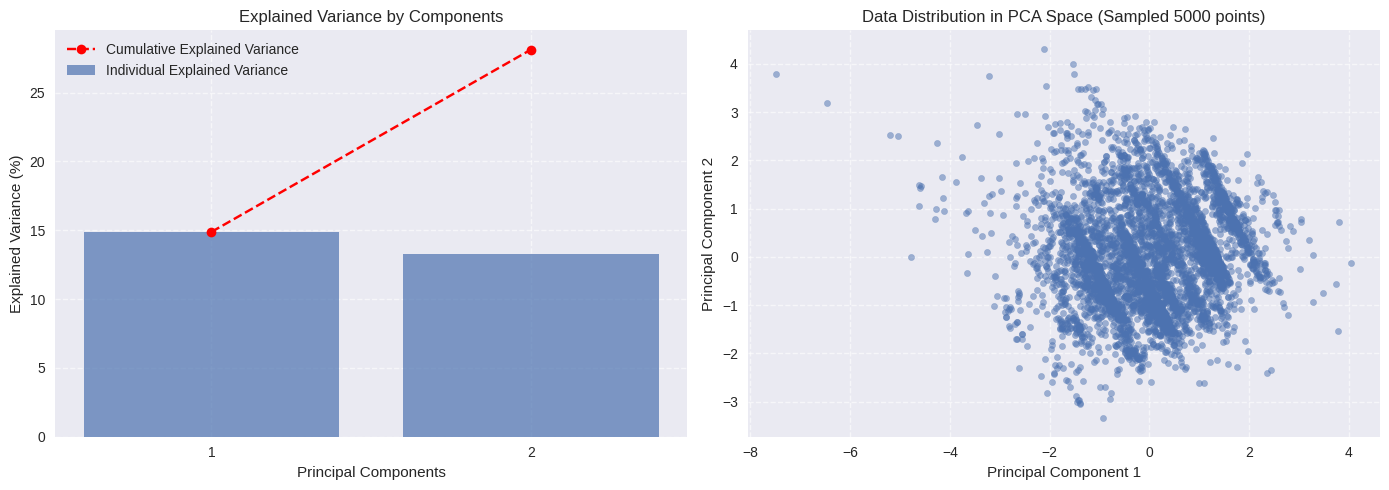

Explained variance ratio: [0.14878447 0.13240902]
Cumulative variance captured by 2 components: 28.12%
Shape after PCA: (45211, 2)


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    Steps:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Initialize and fit PCA
    # Using random_state for reproducible results
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)

    # Explained variance ratios
    explained_var = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)

    # Visualization
    plt.figure(figsize=(14, 5))

    # ---- Plot 1: Explained variance per component ----
    plt.subplot(1, 2, 1)
    # Create bar plot for individual variance
    plt.bar(range(1, n_components + 1), explained_var * 100, alpha=0.7,
            align='center', label='Individual Explained Variance')
    # Create line plot for cumulative variance
    plt.plot(range(1, n_components + 1), cumulative_var * 100,
             marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')

    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance (%)')
    plt.title('Explained Variance by Components')
    plt.xticks(range(1, n_components + 1)) # Ensure ticks are integers (1, 2)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)


    # ---- Plot 2: 2D PCA scatter plot ----
    plt.subplot(1, 2, 2)
    # Use a sample for plotting if the dataset is large, to avoid overplotting
    sample_size = 5000
    if X_pca.shape[0] > sample_size:
        np.random.seed(42)
        sample_indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
        X_pca_sample = X_pca[sample_indices]
    else:
        X_pca_sample = X_pca

    plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], s=20, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Data Distribution in PCA Space (Sampled {min(sample_size, X_pca.shape[0])} points)')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig('pca_plots.png') # Save the figure
    plt.show()

    print(f"Explained variance ratio: {explained_var}")
    print(f"Cumulative variance captured by {n_components} components: {cumulative_var[-1] * 100:.2f}%")

    return X_pca

# Apply PCA
# (Assumes X_scaled is loaded from the previous cell)
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Calculating inertia for k=1 to 10...


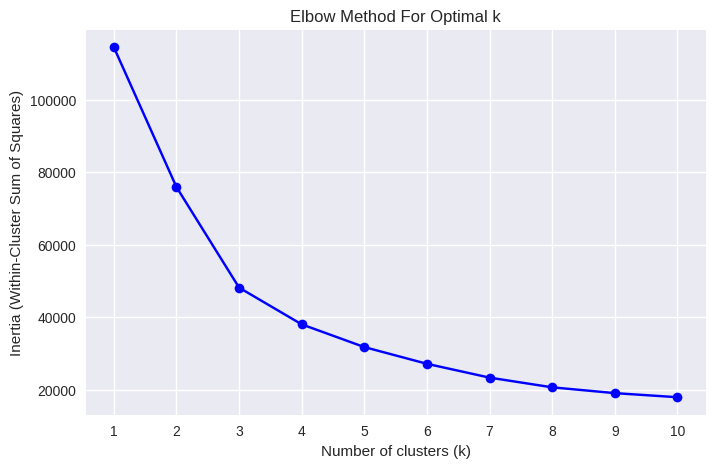

Calculating Silhouette scores for k=2 to 10...


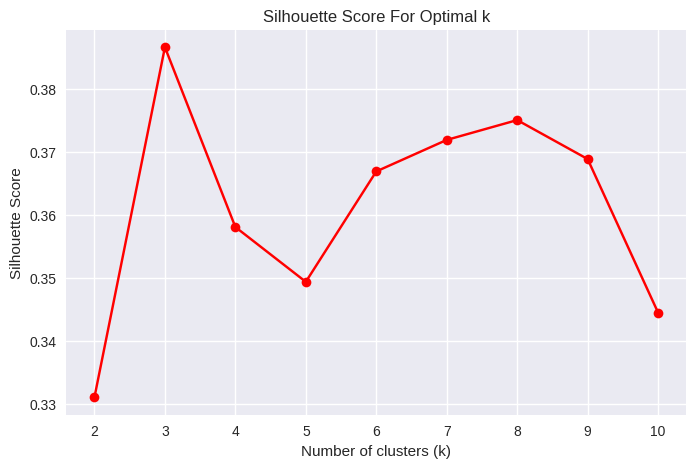

Optimal k based on highest Silhouette Score: 3
Applying final clustering with k=3...


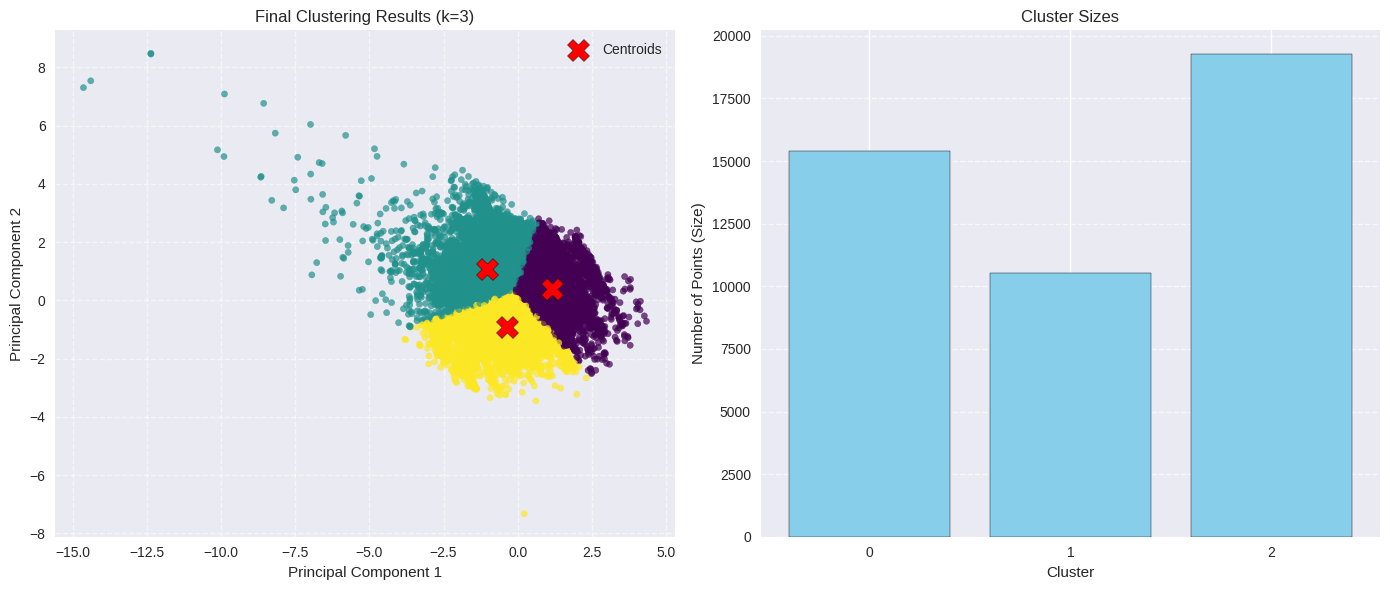


Clustering Evaluation:
Inertia (k=3): 48179.64
Silhouette Score (k=3): 0.39


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prerequisite Code (from previous steps) ---
# (Make sure X_scaled and X_pca are loaded and available)
# (This code assumes the KMeansClustering class from the
#  previous step has been defined and is available)

# --- Start of User's Cell ---

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    # Iterate over each cluster
    for k in range(len(centroids)):
        # Get all points assigned to this cluster
        cluster_points = X[labels == k]

        # Get the centroid for this cluster
        centroid = centroids[k]

        # Calculate the sum of squared distances for this cluster
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroid) ** 2)

    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    print(f"Calculating inertia for k=1 to {max_k}...")
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bo-') # 'bo-' = blue dots connected by lines
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.savefig('elbow_curve.png') # Save the plot
    plt.show()

    return inertias

def plot_silhouette_scores(X, max_k=10):
    """Plot the silhouette scores for different values of k."""
    silhouette_vals = []
    # Note: Silhouette score starts at k=2
    K = range(2, max_k + 1)

    print(f"Calculating Silhouette scores for k=2 to {max_k}...")
    for k in K:
        # 1. Try different values of k
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # 2. Calculate silhouette score
        score = silhouette_score(X, kmeans.labels)
        silhouette_vals.append(score)

    # 3. Create silhouette plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, silhouette_vals, 'ro-') # 'ro-' = red dots connected by lines
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.savefig('silhouette_plot.png') # Save the plot
    plt.show()

    return silhouette_vals

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

silhouette_scores = plot_silhouette_scores(X_pca, max_k=10)

# --- AUTOMATICALLY FIND BEST K ---
# Find optimal k from silhouette score (k starts at 2, so add 2 to the index)
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal k based on highest Silhouette Score: {optimal_k}")


# Apply final clustering
print(f"Applying final clustering with k={optimal_k}...")
kmeans = KMeansClustering(n_clusters=optimal_k)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(14, 6))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=20, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=250, label='Centroids', edgecolor='black')
plt.title(f'Final Clustering Results (k={optimal_k})') # Updated title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot evaluation metrics
plt.subplot(1, 2, 2)
# --- Plotting cluster sizes as an evaluation metric ---
unique_labels, counts = np.unique(kmeans.labels, return_counts=True)
plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Points (Size)')
plt.title('Cluster Sizes')
plt.xticks(unique_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# --- End of added plot ---

plt.tight_layout()
plt.savefig('final_clustering_plots.png')
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia (k={optimal_k}): {inertia:.2f}") # Updated print
print(f"Silhouette Score (k={optimal_k}): {silhouette:.2f}") # Updated print

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [22]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Bisecting (divisive) KMeans clustering algorithm."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}   # parent → (left child, right child)
        self.centers_ = {}     # cluster id → centroid

    def fit_predict(self, X):
        X = np.array(X)
        n_samples = len(X)

        # Start with all points in cluster 0
        labels = np.zeros(n_samples, dtype=int)
        next_label_id = 1  # next new cluster label

        # Continue splitting until we reach n_clusters
        while len(np.unique(labels)) < self.n_clusters:

            # ---- Step 1: choose cluster to split (largest cluster) ----
            unique, counts = np.unique(labels, return_counts=True)
            cluster_sizes = dict(zip(unique, counts))
            cluster_to_split = max(cluster_sizes, key=cluster_sizes.get)

            # Extract points belonging to this cluster
            mask = labels == cluster_to_split
            X_cluster = X[mask]

            # ---- Step 2: run KMeans with k=2 ----
            km = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = km.fit_predict(X_cluster)

            # sub_labels gives 0 or 1 → split into two child clusters
            left_child = cluster_to_split         # keep original cluster id
            right_child = next_label_id           # assign a new id

            # ---- Step 3: assign new labels back into global array ----
            # left child = subcluster 0
            labels[mask] = np.where(sub_labels == 0, left_child, labels[mask])
            # right child = subcluster 1
            labels[mask] = np.where(sub_labels == 1, right_child, labels[mask])

            # ---- Step 4: update bookkeeping ----
            self.split_tree[cluster_to_split] = (left_child, right_child)
            self.centers_[left_child] = km.cluster_centers_[0]
            self.centers_[right_child] = km.cluster_centers_[1]

            next_label_id += 1  # increment for next new cluster

        self.labels_ = labels
        return labels

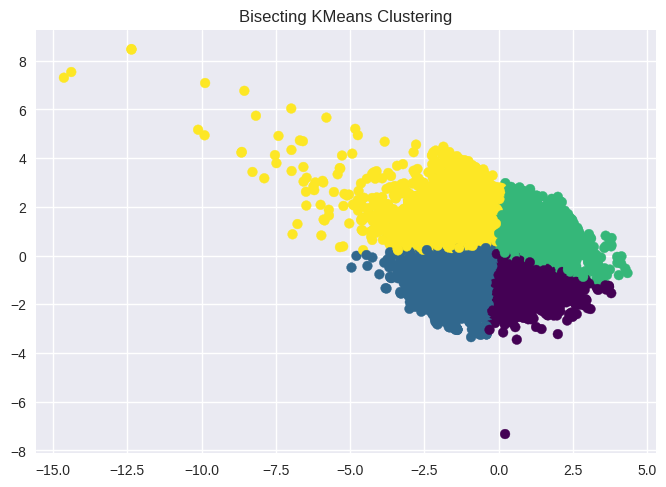

In [23]:
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Bisecting KMeans Clustering")
plt.show()

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

In [18]:
class KMeansPlusPlus(KMeansClustering):
    """
    Inherits from KMeansClustering and overrides the initialization
    method to use k-means++ instead of random selection.
    """

    def _initialize_centroids(self, X):
        """Initialize centroids using the k-means++ algorithm.

        This method is more intelligent than random selection and leads
        to faster convergence and more consistent results.
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Initialize an array to hold the centroids
        centroids = np.zeros((self.n_clusters, n_features))

        # Step 1: Choose the first centroid randomly from the data
        first_centroid_idx = np.random.randint(n_samples)
        centroids[0] = X[first_centroid_idx]

        # Initialize an array to store the squared distances
        # from each point to its *nearest* centroid
        min_sq_distances = np.full(n_samples, np.inf)

        # --- Loop to select the remaining k-1 centroids ---
        for k in range(1, self.n_clusters):

            # For each data point, find the squared distance to the *newest* centroid (centroids[k-1])
            sq_distances = np.sum((X - centroids[k-1])**2, axis=1)

            # Update the minimum distance for each point if the new centroid is closer
            min_sq_distances = np.minimum(min_sq_distances, sq_distances)

            # Step 2: Calculate the probability distribution
            # Probabilities are proportional to the squared distances
            probabilities = min_sq_distances / np.sum(min_sq_distances)

            # Step 3: Choose the next centroid based on this probability distribution
            # `p=probabilities` ensures weighted random sampling
            next_centroid_idx = np.random.choice(n_samples, p=probabilities)

            # Add the new centroid
            centroids[k] = X[next_centroid_idx]

            # Reset the distance for the chosen point to 0
            # so it's not picked again (optional but good practice)
            min_sq_distances[next_centroid_idx] = 0.0

        return centroids

print("Running K-Means with k-means++ initialization...")

# Instead of: kmeans = KMeansClustering(n_clusters=3)
kmeans_pp = KMeansPlusPlus(n_clusters=3, random_state=42)

# Now fit this new class object
kmeans_pp.fit(X_pca)

print("k-means++ fit complete.")


Running K-Means with k-means++ initialization...
k-means++ fit complete.


--- Starting Cluster Interpretation ---
--- Cluster Means (Numerical Features) ---
               age      balance  campaign  previous
cluster                                            
0        39.375316   691.043605  2.662773  0.554409
1        52.785220  2937.094298  2.810360  0.469595
2        35.699932  1037.442131  2.819253  0.661665


--- Cluster Modes (Categorical Features) ---
                 job  education housing loan  marital
cluster                                              
0        blue-collar  secondary     yes   no  married
1         management  secondary      no   no  married
2         management   tertiary     yes   no  married


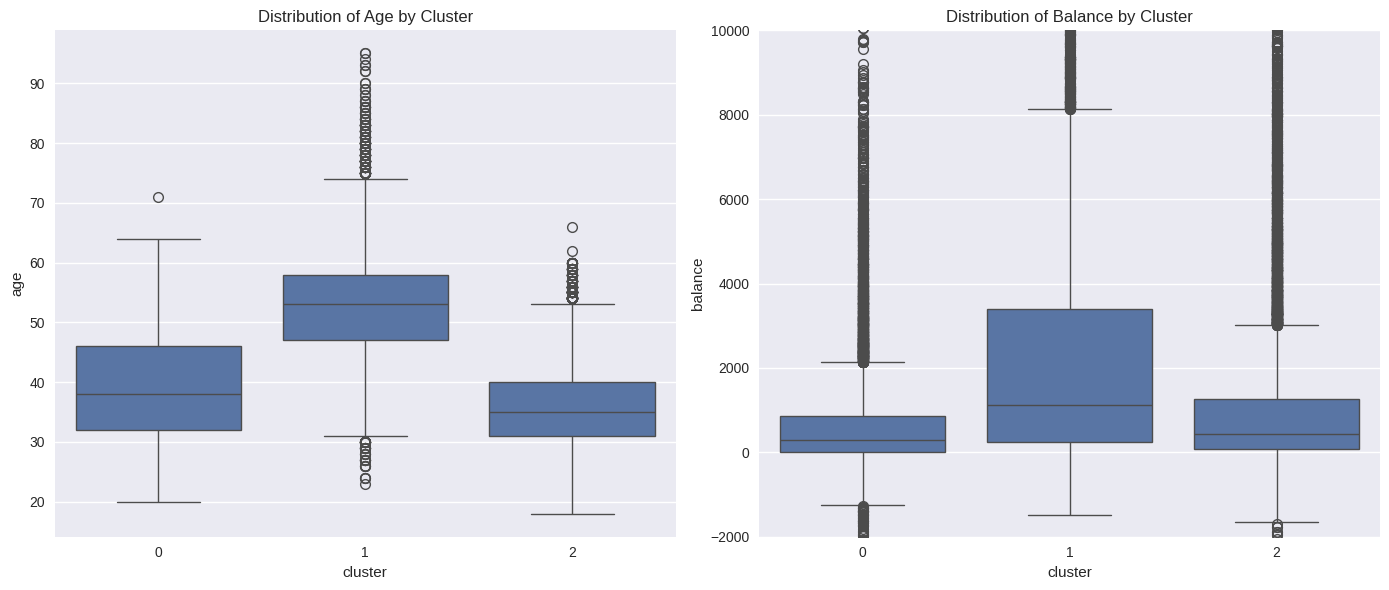

In [19]:
print("--- Starting Cluster Interpretation ---")

# Add the cluster labels to the original (unscaled) DataFrame
data_with_clusters = data.copy()
# --- THIS IS THE CORRECTED LINE ---
data_with_clusters['cluster'] = kmeans.labels # Use .labels (no underscore)

# --- Analyze Numerical Features ---
# (Select relevant features you want to compare)
features_to_compare = ['age', 'balance', 'campaign', 'previous']
cluster_means = data_with_clusters.groupby('cluster')[features_to_compare].mean()

print("--- Cluster Means (Numerical Features) ---")
print(cluster_means)
print("\n")

# --- Analyze Categorical Features ---
# (Get the most common value (mode) for each cluster)
categorical_to_compare = ['job', 'education', 'housing', 'loan', 'marital']
# Using .agg() to get the first mode for each
cluster_modes = data_with_clusters.groupby('cluster')[categorical_to_compare].agg(lambda x: x.mode().iloc[0])

print("--- Cluster Modes (Categorical Features) ---")
print(cluster_modes)

# --- Visualization Example using Box Plots ---
plt.figure(figsize=(14, 6))

# Plot 'age'
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='age', data=data_with_clusters)
plt.title('Distribution of Age by Cluster')

# Plot 'balance'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='balance', data=data_with_clusters)
plt.title('Distribution of Balance by Cluster')
# Set a y-limit to zoom in and ignore extreme outliers for better plot readability
plt.ylim(-2000, 10000)

plt.tight_layout()
plt.savefig('cluster_interpretation_plots.png')
plt.show()

In [20]:
class KMeansManhattan(KMeansClustering):
    """
    Inherits from KMeansClustering and overrides the distance
    calculation to use Manhattan (L1) distance instead of Euclidean (L2).
    """

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid
           using Manhattan (L1) distance.
        """
        # X shape: (n_samples, 1, n_features)
        # self.centroids shape: (1, n_clusters, n_features)
        diff = X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]

        # L1 norm: sum of absolute differences
        # axis=2 is the feature axis
        distances = np.sum(np.abs(diff), axis=2)

        # Find the index (cluster) of the minimum distance
        labels = np.argmin(distances, axis=1)
        return labels

# --- How to use it: ---
print("Running K-Means with Manhattan distance...")
kmeans_manhattan = KMeansManhattan(n_clusters=3, random_state=42)
kmeans_manhattan.fit(X_pca)

print("Manhattan K-Means fit complete.")

# You can now compare its silhouette score to the original
# (Assumes 'kmeans' is your original fitted model)

# --- THESE ARE THE CORRECTED LINES ---
silhouette_euclidean = silhouette_score(X_pca, kmeans.labels)
silhouette_manhattan = silhouette_score(X_pca, kmeans_manhattan.labels)
# --- END OF CORRECTIONS ---

print(f"Original Silhouette (Euclidean): {silhouette_euclidean:.3f}")
print(f"New Silhouette (Manhattan): {silhouette_manhattan:.3f}")

Running K-Means with Manhattan distance...
Manhattan K-Means fit complete.
Original Silhouette (Euclidean): 0.387
New Silhouette (Manhattan): 0.378


--- Starting Outlier Detection ---
Total points: 45211
Distance threshold for outliers: 2.44
Found 478 potential outliers.


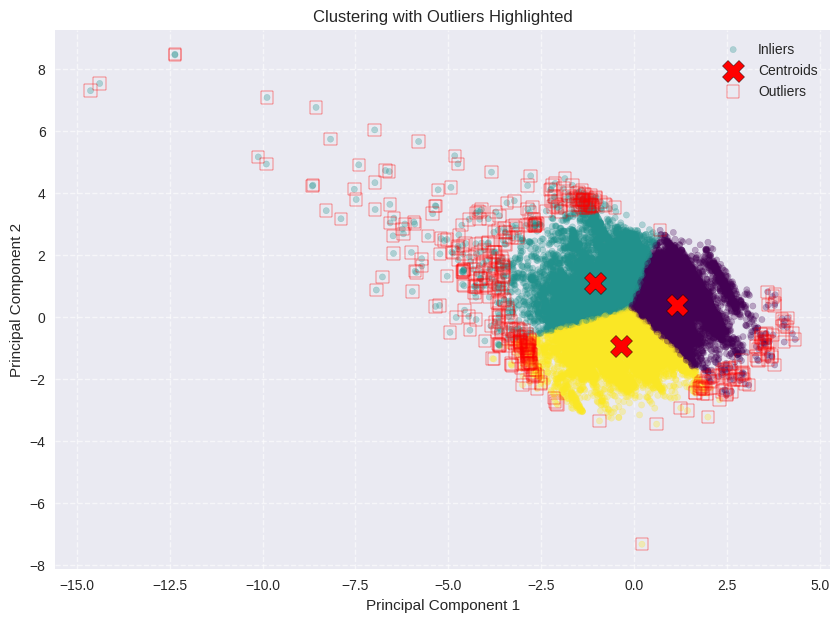

In [21]:
print("--- Starting Outlier Detection ---")

# 1. Calculate distance for each point to its assigned centroid
distances = np.zeros(X_pca.shape[0])
for k in range(kmeans.n_clusters):

    # --- THIS IS THE CORRECTED LINE ---
    # Get mask for points in this cluster
    cluster_points_mask = (kmeans.labels == k)
    # --- END OF CORRECTION ---

    # Check if cluster is not empty
    if np.any(cluster_points_mask):
        cluster_points = X_pca[cluster_points_mask]
        centroid = kmeans.centroids[k]

        # Calculate Euclidean distances for all points in this cluster
        point_distances = np.linalg.norm(cluster_points - centroid, axis=1)

        # Store these distances in the main distances array
        distances[cluster_points_mask] = point_distances

# 2. Find the threshold (e.g., 3 standard deviations from the mean distance)
mean_distance = np.mean(distances)
std_distance = np.std(distances)
outlier_threshold = mean_distance + 3 * std_distance

# 3. Identify outliers
outlier_indices = np.where(distances > outlier_threshold)[0]
outlier_points = X_pca[outlier_indices]

print(f"Total points: {len(X_pca)}")
print(f"Distance threshold for outliers: {outlier_threshold:.2f}")
print(f"Found {len(outlier_points)} potential outliers.")

# 4. Visualize the outliers
plt.figure(figsize=(10, 7))
# Plot inliers with low alpha
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=20, alpha=0.3, label='Inliers')
# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=250, label='Centroids', edgecolor='black')

# Plot outliers as hollow red squares
plt.scatter(outlier_points[:, 0], outlier_points[:, 1],
            c='none', marker='s', s=80, label='Outliers', edgecolor='red')

plt.title('Clustering with Outliers Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('cluster_outlier_plot.png')
plt.show()